In [1]:
import requests
import mysql.connector
from datetime import datetime
import time

mysql_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'root',
    'database': 'amazonApi'
}

api_url = 'https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi'

def fetchData():
    try:
        response = requests.get(api_url)
        data = response.json()
        
        conn = mysql.connector.connect(**mysql_config)
        cursor = conn.cursor()
        query = "INSERT INTO apiData (factor, pi, time) VALUES (%s, %s, %s)"
        cursor.execute(query, (data['factor'], data['pi'], data['time']))
        conn.commit()
        cursor.close()
        conn.close()
        
        print("Data stored successfully at", data['time'])
    except Exception as e:
        print("Error:", e)

def main():
    for _ in range(60):
        fetchData()
        time.sleep(60)

if __name__ == "__main__":
    main()


Data stored successfully at 2024-05-07 17:04:27
Data stored successfully at 2024-05-07 17:05:28
Data stored successfully at 2024-05-07 17:06:29
Data stored successfully at 2024-05-07 17:07:29
Data stored successfully at 2024-05-07 17:08:30
Data stored successfully at 2024-05-07 17:09:31
Data stored successfully at 2024-05-07 17:10:32
Data stored successfully at 2024-05-07 17:11:32
Data stored successfully at 2024-05-07 17:12:33
Data stored successfully at 2024-05-07 17:13:34
Data stored successfully at 2024-05-07 17:14:35
Data stored successfully at 2024-05-07 17:15:36
Data stored successfully at 2024-05-07 17:16:37
Data stored successfully at 2024-05-07 17:17:37
Data stored successfully at 2024-05-07 17:18:38
Data stored successfully at 2024-05-07 17:19:39
Data stored successfully at 2024-05-07 17:20:40
Data stored successfully at 2024-05-07 17:21:41
Data stored successfully at 2024-05-07 17:22:42
Data stored successfully at 2024-05-07 17:23:43
Data stored successfully at 2024-05-07 1

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
mysql_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'root',
    'database': 'amazonApi'
}

conn = mysql.connector.connect(**mysql_config)
query = "SELECT * FROM apiData"
df = pd.read_sql(query, conn)
conn.close()

print("Fetched data from database:")
df.head()


Fetched data from database:


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6168\1964709968.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


id  factor     pi                time
0   1      64  3.126 2024-05-07 17:04:27
1   2     125  3.150 2024-05-07 17:05:28
2   3     216  3.137 2024-05-07 17:06:29
3   4     343  3.145 2024-05-07 17:07:29
4   5     512  3.140 2024-05-07 17:08:30

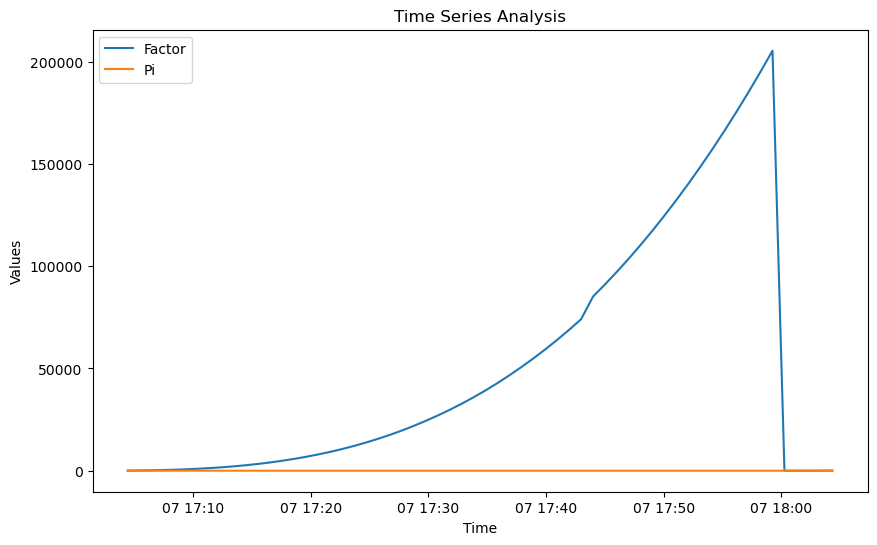

Statistical Analysis:
Factor Mean: 50890.96666666667
Pi Mean: 3.168566666666666
Factor Standard Deviation: 60401.83900864268
Pi Standard Deviation: 0.15663823879598285
Correlation between Factor and Pi: -0.14538164551034513
Outliers in Factor: Empty DataFrame
Columns: [id, factor, pi, time]
Index: []
Outliers in Pi:     id  factor   pi                time
55  56       1  4.0 2024-05-07 18:00:16
56  57       1  4.0 2024-05-07 18:01:17


In [3]:


# Time Series Analysis
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['factor'], label='Factor')
plt.plot(df['time'], df['pi'], label='Pi')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Analysis')
plt.legend()
plt.show()

# Statistical Analysis
factor_mean = df['factor'].mean()
pi_mean = df['pi'].mean()
factor_std = df['factor'].std()
pi_std = df['pi'].std()

print("Statistical Analysis:")
print("Factor Mean:", factor_mean)
print("Pi Mean:", pi_mean)
print("Factor Standard Deviation:", factor_std)
print("Pi Standard Deviation:", pi_std)

# Correlation Analysis
correlation = df['factor'].corr(df['pi'])
print("Correlation between Factor and Pi:", correlation)

# Anomaly Detection (Example: Check for outliers)
outliers_factor = df[df['factor'] > (factor_mean + 3 * factor_std)]
outliers_pi = df[df['pi'] > (pi_mean + 3 * pi_std)]
print("Outliers in Factor:", outliers_factor)
print("Outliers in Pi:", outliers_pi)

### Outlier Graph

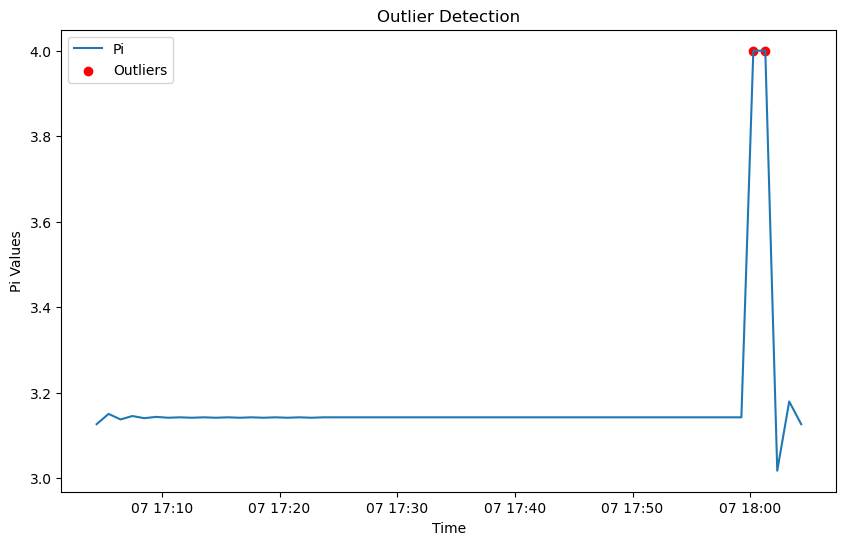

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['pi'], label='Pi')
plt.scatter(outliers_pi['time'], outliers_pi['pi'], color='red', label='Outliers')
plt.xlabel('Time')
plt.ylabel('Pi Values')
plt.title('Outlier Detection')
plt.legend()
plt.show()
